# [ Logistic Regression ]

# Logistic Regression이란

sklearn.linear_model.LogisticRegression

class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)[source]¶

---
# 실습 : Pima 인디안 당뇨병 예측기 생성
- Data : pima 인디안 당뇨병 데이트세트  
- Model : logistic regression, ramdom forest  
- 위 두 모델을 사용해 예측하고 결과를 평가하여 최종 모델을 선정해보자

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv('./diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [197]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

---
## 전처리

In [198]:
df.isna().sum() # 결측치 없음

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [199]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### feature selection

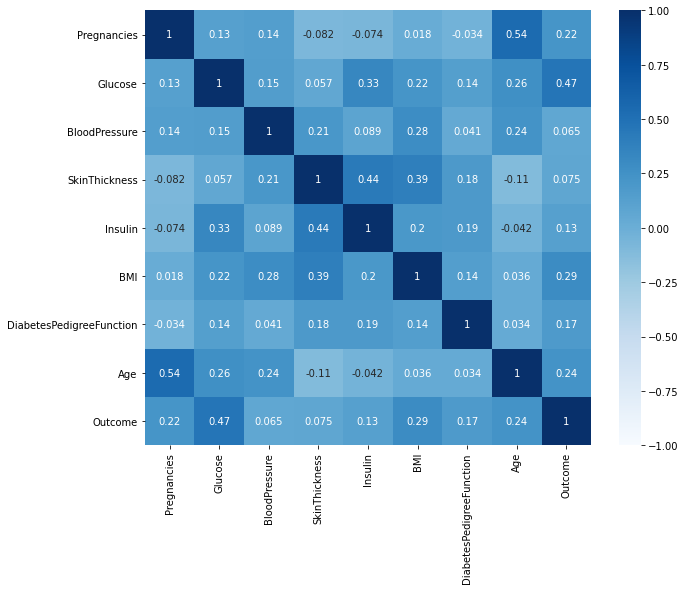

In [200]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.show()

# 0.0~0.3 : 선형관계 x
# 0.3~0.7 : 뚜렷한 양적 선형관계
# 0.7~1.0 : 강한 양적 선형관계

VIF

In [201]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(C=1.0, solver='lbfgs', max_iter=100, n_jobs=None)

def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test, pred)
    print("accuracy:", accuracy)
    df_ac = pd.DataFrame({'VIF': [accuracy]})
    df_ac.index = ["Accuracy"]
    return df_ac

In [202]:
df_copy = df
drop_column = []
target = "Outcome"
drop_list = [target]
drop_list.extend(drop_column)
y = df_copy[target]
X = df_copy.drop(drop_list, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)
pred_proba = model_lr.predict_proba(X_test)[:, 1]


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns, columns=['VIF'])
vif = pd.concat([vif, get_clf_eval(y_test, pred, pred_proba)], axis=0)

vif.sort_values(by='VIF', ascending=False)

accuracy: 0.7532467532467533


,VIF
BMI,18.408884
Glucose,16.725078
BloodPressure,14.619512
Age,13.492985
SkinThickness,4.008696
Pregnancies,3.275748
DiabetesPedigreeFunction,3.195626
Insulin,2.063689
Accuracy,0.753247


In [203]:
df_copy = df
drop_column = ["BMI"]
target = "Outcome"
drop_list = [target]
drop_list.extend(drop_column)
y = df_copy[target]
X = df_copy.drop(drop_list, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)
pred_proba = model_lr.predict_proba(X_test)[:, 1]


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns, columns=['VIF'])
vif = pd.concat([vif, get_clf_eval(y_test, pred, pred_proba)], axis=0)

vif.sort_values(by='VIF', ascending=False)

accuracy: 0.7337662337662337


,VIF
Glucose,13.573749
Age,13.381319
BloodPressure,12.372453
SkinThickness,3.475236
Pregnancies,3.272901
DiabetesPedigreeFunction,3.151598
Insulin,2.033589
Accuracy,0.733766


In [204]:
df_copy = df
drop_column = ["BMI", "Glucose"]
target = "Outcome"
drop_list = [target]
drop_list.extend(drop_column)
y = df_copy[target]
X = df_copy.drop(drop_list, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)
pred_proba = model_lr.predict_proba(X_test)[:, 1]


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns, columns=['VIF'])
vif = pd.concat([vif, get_clf_eval(y_test, pred, pred_proba)], axis=0)

vif.sort_values(by='VIF', ascending=False)

accuracy: 0.6558441558441559


,VIF
Age,10.896809
BloodPressure,9.940457
SkinThickness,3.475014
Pregnancies,3.266130
DiabetesPedigreeFunction,3.026709
Insulin,1.859553
Accuracy,0.655844


In [205]:
# df_copy = df_copy.drop("Age", axis=1)
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = pd.DataFrame(
#     [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])],
#     index=df_copy.columns, columns=['VIF'])
# vif.sort_values(by='VIF', ascending=False)

### data split

In [206]:
target = "Outcome"
drop_list = [target, "Age"]
y = df[target]
X = df.drop(drop_list, axis=1)

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [209]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_train)
roc_auc_score(y_train,y_hat, multi_class='ovr')


(0.7402109925977735, 2)

In [210]:
y_hat

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [212]:
y_train

660    0
69     0
85     0
219    1
712    1
      ..
578    0
53     1
350    0
79     0
520    0
Name: Outcome, Length: 614, dtype: int64

In [ ]:
y_train

---
## Modeling

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model_lr = LogisticRegression(C=1.0, solver='lbfgs', max_iter=100, n_jobs=None)
model_rf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='sqrt', max_leaf_nodes=None, n_jobs=None, random_state=None)
model_xg = XGBClassifier(eval_metric='mlogloss', use_label_encoder =False)

In [99]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print("accuracy:", accuracy)

In [100]:
model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)
pred_proba = model_lr.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

accuracy: 0.7337662337662337


In [101]:
model_rf.fit(X_train, y_train)
pred = model_rf.predict(X_test)
pred_proba = model_rf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

accuracy: 0.6818181818181818


In [102]:
model_xg.fit(X_train, y_train)
pred = model_xg.predict(X_test)
pred_proba = model_xg.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

accuracy: 0.6818181818181818


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
models = [
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    SVC(),
    XGBClassifier(),
    SGDClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
    ]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'auc_val':[]}

    
for clf in models:
    clf = clf.fit(X_train, y_train)
#1열:Train
    y_hat = clf.predict(X_train)
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Test
    y_hat = clf.predict(X_test)
    results = (round(accuracy_score(y_test,y_hat),2),
                round(precision_score(y_test,y_hat),2),
                round(recall_score(y_test,y_hat),2),
                round(f1_score(y_test,y_hat),2),
                round(roc_auc_score(y_test,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['auc_train'].append(results_train[1])
    rdict['acc_test'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['auc_val'].append(results[4])   

    print(results_train, results)

rdf = pd.DataFrame(data=rdict)
rdf 

(1.0, 1.0) (0.73, 0.64, 0.47, 0.54, 0.67)
(0.71, 0.71) (0.75, 0.62, 0.68, 0.65, 0.73)
(0.84, 0.81) (0.69, 0.55, 0.51, 0.53, 0.65)
(0.79, 0.75) (0.75, 0.67, 0.55, 0.6, 0.7)
(0.77, 0.72) (0.74, 0.68, 0.47, 0.56, 0.68)
[10:32:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(1.0, 1.0) (0.69, 0.56, 0.51, 0.53, 0.65)
(0.69, 0.64) (0.7, 0.59, 0.45, 0.51, 0.64)
(0.95, 0.94) (0.69, 0.56, 0.47, 0.51, 0.64)
(1.0, 1.0) (0.69, 0.55, 0.51, 0.53, 0.65)
(0.8, 0.77) (0.75, 0.69, 0.51, 0.59, 0.7)


,model,acc_train,auc_train,acc_test,precision,recall,f1_score,auc_val
0,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.00,0.73,0.64,0.47,0.54,0.67
1,MLPClassifier(),0.71,0.71,0.75,0.62,0.68,0.65,0.73
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.84,0.81,0.69,0.55,0.51,0.53,0.65
3,LogisticRegression(),0.79,0.75,0.75,0.67,0.55,0.60,0.70
4,SVC(),0.77,0.72,0.74,0.68,0.47,0.56,0.68
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",1.00,1.00,0.69,0.56,0.51,0.53,0.65
6,SGDClassifier(),0.69,0.64,0.70,0.59,0.45,0.51,0.64
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.95,0.94,0.69,0.56,0.47,0.51,0.64
8,DecisionTreeClassifier(),1.00,1.00,0.69,0.55,0.51,0.53,0.65
9,KNeighborsClassifier(),0.80,0.77,0.75,0.69,0.51,0.59,0.70


In [88]:
models = [
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    SVC(),
    XGBClassifier(),
    SGDClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
    ]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'auc_val':[]}

    
for clf in models:
    clf = clf.fit(X_train, y_train)
#1열:Train
    y_hat = clf.predict(X_train)
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Test
    y_hat = clf.predict(X_test)
    results = (round(accuracy_score(y_test,y_hat),2),
                round(precision_score(y_test,y_hat),2),
                round(recall_score(y_test,y_hat),2),
                round(f1_score(y_test,y_hat),2),
                round(roc_auc_score(y_test,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['auc_train'].append(results_train[1])
    rdict['acc_test'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['auc_val'].append(results[4])   

    print(results_train, results)

rdf = pd.DataFrame(data=rdict)
rdf 

(1.0, 1.0) (0.71, 0.61, 0.47, 0.53, 0.66)
(0.7, 0.59) (0.69, 0.71, 0.19, 0.3, 0.57)
(0.84, 0.81) (0.69, 0.57, 0.49, 0.53, 0.65)
(0.78, 0.73) (0.73, 0.66, 0.47, 0.55, 0.67)
(0.76, 0.7) (0.73, 0.67, 0.45, 0.54, 0.67)
[11:03:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(1.0, 1.0) (0.72, 0.61, 0.51, 0.56, 0.67)
(0.68, 0.6) (0.66, 0.5, 0.28, 0.36, 0.57)
(0.93, 0.91) (0.68, 0.55, 0.45, 0.49, 0.63)
(1.0, 1.0) (0.66, 0.51, 0.55, 0.53, 0.63)
(0.8, 0.77) (0.71, 0.6, 0.47, 0.53, 0.65)


,model,acc_train,auc_train,acc_test,precision,recall,f1_score,auc_val
0,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.00,0.71,0.61,0.47,0.53,0.66
1,MLPClassifier(),0.70,0.59,0.69,0.71,0.19,0.30,0.57
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.84,0.81,0.69,0.57,0.49,0.53,0.65
3,LogisticRegression(),0.78,0.73,0.73,0.66,0.47,0.55,0.67
4,SVC(),0.76,0.70,0.73,0.67,0.45,0.54,0.67
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",1.00,1.00,0.72,0.61,0.51,0.56,0.67
6,SGDClassifier(),0.68,0.60,0.66,0.50,0.28,0.36,0.57
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.93,0.91,0.68,0.55,0.45,0.49,0.63
8,DecisionTreeClassifier(),1.00,1.00,0.66,0.51,0.55,0.53,0.63
9,KNeighborsClassifier(),0.80,0.77,0.71,0.60,0.47,0.53,0.65
